# Assignment 2 - Image filters 

Prepared by: Yu Feng, Chuan Chen, Yi Zhang (Chair of Cartography and Visual Analytics, TUM)

Contact: y.feng@tum.de, chuan.chen@tum.de

#### Definition

- __I__: Image to convolve.
- __H__: filter matrix to convolve the image with.
- __J__: Result of the convolution.

The following graphics shows exemplary the mathematical operations of the convolution. The filter matrix __H__ is shifted over the input image __I__. The values 'under' the filter matrix are multiplicated with the corresponding values in __H__, summed up and writen to the result __J__. The target position is usually the position under the center of __H__.

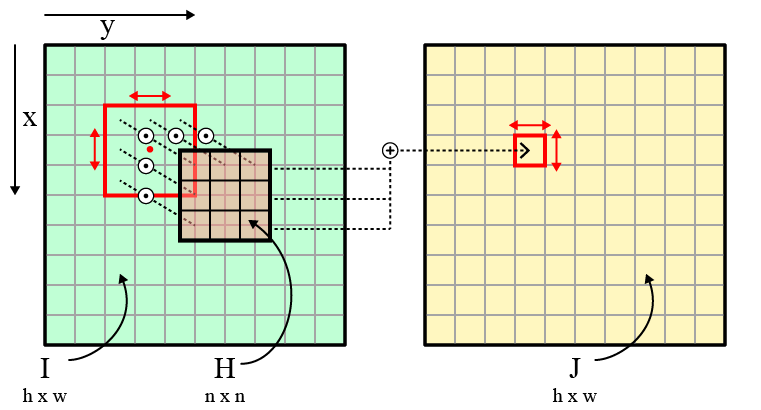

At the image boundaries, the filter mask will be outside the image. So we need to extend the image boundaries, which is called "padding".



### Import the 3rd party libraries

In [1]:
# Numpy offers comprehensive mathematical functions in Python
import numpy as np

# OpenCV provides a optimized tools for Computer Vision.
import cv2 as cv

# Matplotlib is a library for creating visualizations in Python.
from matplotlib import pyplot as plt

#Scikit-image offers a random noise method
from skimage.util import random_noise

### Task 1: Convolution
In this task you will exercise with padding and convolution:

Steps:
1. padding the given src_img using different image boundaries (zero, wrap, clamp, mirror), padding width = 20
2. convolve the given kernel with src_mat

Variables:
1. `zero_padding` : extended image using zero padding
2. `wrap_padding` : extended image using wrap padding
3. `clamp_padding` : extended image using clamp padding
4. `mirror_padding` : extended image using mirror padding
5. `conv_mat` : convolution result

Hints:
1. Function [cv.copyMakeBorder](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga2ac1049c2c3dd25c2b41bffe17658a36) to padding
2. Function [cv.filter2D](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve a kernel with an image. Notice that `cv.filter2D` will automatically create padding according to `borderType`(See Hint 3), you don't need to do padding before you call.
3. The 7th parameter of `cv.filter2D` is `borderType` defines the padding methods, seeing [BorderTypes](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5) to know about basic type of padding in OpenCV, default as `BORDER_CONSTANT`. Flag defining what kind of border to be added. It can be following types:
  - cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
  - cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
  - cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
  - cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
  - cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg

#### Quiz 1:

__Which borderTypes will provide continous grey values at the border? and which may have strong grey value changes?__

Your answer:

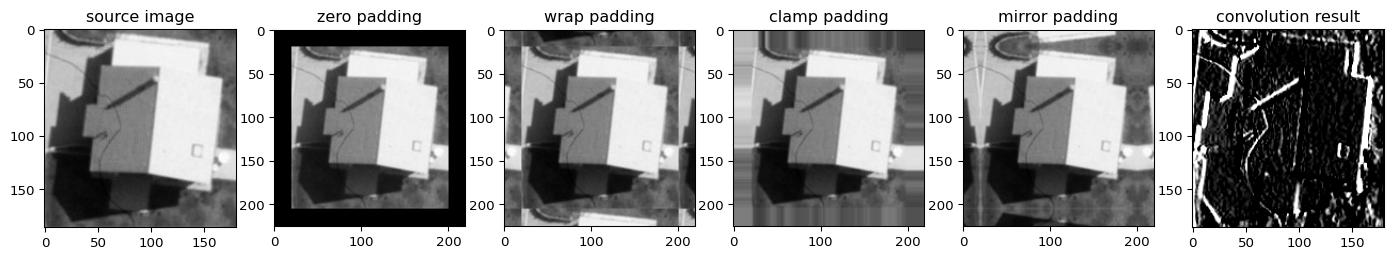

In [2]:
src_img = cv.imread('./examples/house.jpg',cv.IMREAD_GRAYSCALE)

kernel =  np.array([[3,0,-3],[10,0,-10],[3,0,-3]])


### BEGIN SOLUTION


### END SOLUTION


plt.figure(figsize=(18, 8), dpi=96)
plt.subplot(1,6,1)
plt.title("source image")
plt.imshow(src_img, cmap='gray')

plt.subplot(1,6,2)
plt.title("zero padding")
plt.imshow(zero_padding, cmap=plt.cm.gray)

plt.subplot(1,6,3)
plt.title("wrap padding")
plt.imshow(wrap_padding, cmap=plt.cm.gray)

plt.subplot(1,6,4)
plt.title("clamp padding")
plt.imshow(clamp_padding, cmap=plt.cm.gray)

plt.subplot(1,6,5)
plt.title("mirror padding")
plt.imshow(mirror_padding, cmap=plt.cm.gray)

plt.subplot(1,6,6)
plt.title("convolution result")
plt.imshow(conv_mat, cmap='gray')

plt.show()

In [3]:

assert zero_padding[0,0] == 0, f'The pixel(0,0) in zero padding result is 0 expected, but got: {zero_padding[0,0]}'
assert wrap_padding[0,0] == 116, f'The pixel(0,0) in wrap padding result is 116 expected, but got: {zero_padding[0,0]}'
assert clamp_padding[0,0] == 188, f'The pixel(0,0) in clamp padding result is 188 expected, but got: {zero_padding[0,0]}'
assert mirror_padding[0,0] == 193, f'The pixel(0,0) in mirror padding result is 193 expected, but got: {zero_padding[0,0]}'
assert conv_mat[134,36] == 42, f'The pixel(134,36) in conv_mat is 42 expected, but got: {conv_mat[134,36]}'


### Task 2: Image smoothing - Box Filter, Binomial Filter and Median Filter
In this task you will create kernels of different filters and apply it on the given images:

Steps:
1. create the kernel of 5x5 box filter and apply it on `src_img`
2. create the kernel of 3x3 binomial filter and apply it on `src_img`
3. apply 5x5 median filter on the given `saltNpepper_noise_img`

Variables:
1. `box_kernel` : kernel of box filter
2. `binomial_kernel` : kernel of binomial filter
3. `box_result` : convolution result using box filter
4. `binomial_result` : convolution result using binomial filter
5. `median_result` : convolution result using median filter

Hints:
1. Function [cv.medianBlur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) to use median filter

#### Quiz 2:

__Please try to characterize the images after applying different filters.__

Your answer:

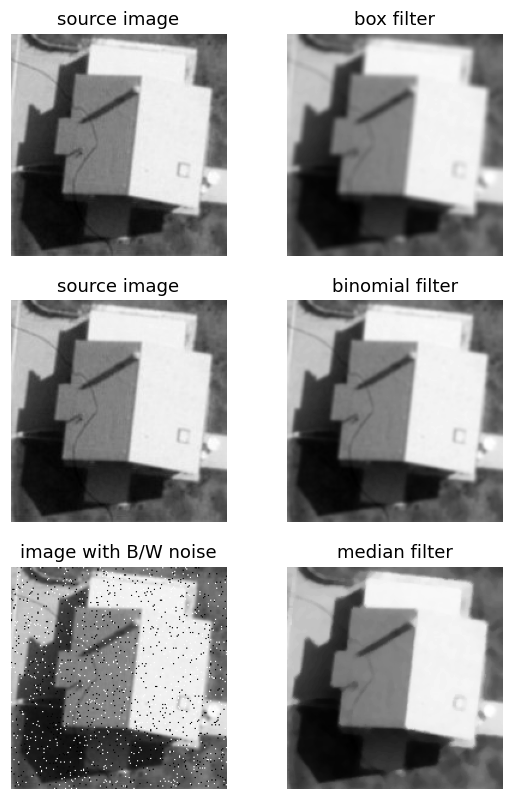

In [4]:
saltNpepper_noise_img = (255*random_noise(src_img,mode='s&p')).astype(np.uint8)



### BEGIN SOLUTION



### END SOLUTION



plt.figure(figsize=(6, 9), dpi=109)
plt.subplot(3,2,1)
plt.imshow(src_img,cmap='gray')
plt.title("source image")
plt.axis ('off')
plt.subplot(3,2,2)
plt.imshow(box_result,cmap='gray')
plt.title("box filter")
plt.axis ('off')
plt.subplot(3,2,3)
plt.imshow(src_img,cmap='gray')
plt.title("source image")
plt.axis ('off')
plt.subplot(3,2,4)
plt.imshow(binomial_result,cmap='gray')
plt.title("binomial filter")
plt.axis ('off')
plt.subplot(3,2,5)
plt.imshow(saltNpepper_noise_img,cmap='gray')
plt.title("image with B/W noise")
plt.axis ('off')
plt.subplot(3,2,6)
plt.imshow(median_result,cmap='gray')
plt.title("median filter")
plt.axis ('off')
plt.show()

In [5]:

assert np.sum(np.sum(box_kernel)) == 1, f'The sum of box kernel is 1 expected, but got:{np.sum(np.sum(box_kernel))}'
assert box_kernel.min() == box_kernel.max(), 'All elements of box kernel are expected the same.'
assert binomial_kernel[2,1] == 0.125, 'wrong binomial kernel'
assert box_result[50,98] == 79, f'Pixel(50,98) of box result is 79 expected, but got:{box_result[50,98]}'
assert binomial_result[50,98] == 71, f'Pixel(50,98) of binomial result is 71 expected, but got:{binomial_result[50,98]}'
assert median_result[50,98] == 73, f'Pixel(50,98) of median result is 73 expected, but got:{median_result[50,98]}'


### Task 3: Sobel Filter
In this task you will create kernels of sobel filters and apply it on the `src_img` above:

Steps:
1. create the kernel of 3x3 sobel filter in x and y direction separately
2. apply them respectively to calculate x and y gradient
3. calculate the magnitude and the direction of the gradient

Variables:
1. `sobel_x_kernel` : kernel of sobel filter in x direction
2. `sobel_y_kernel` : kernel of sobel filter in y direction
3. `gradient_x` : gradient of `src_img` in x direction
4. `gradient_y` : gradient of `src_img` in y direction
5. `magnitude` : magnitude  of gradient
6. `direction` : direction of gradient

Hints:
1. Function [cv.filter2D](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve a kernel with an image.
2. The 2nd parameter of function `cv.filter2D` here should be `cv.CV_64F` to prevent a bug.


#### Quiz 3:

__Please explain why we need to calculate the magnitude and direction for the gradient images?__

Your answer:

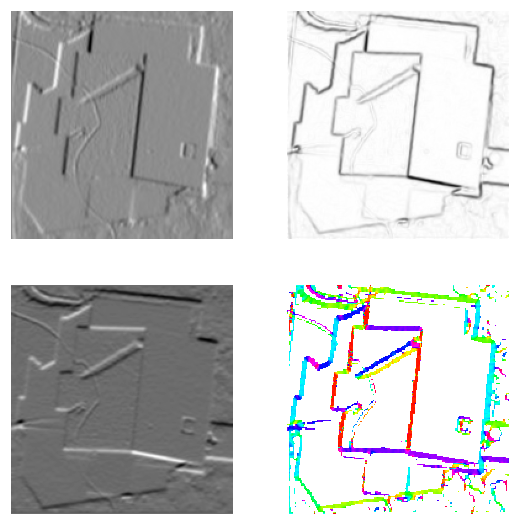

In [6]:
### BEGIN SOLUTION



### END SOLUTION



plt.figure(figsize=(6, 6), dpi=109)

plt.subplot(2,2,1)
plt.imshow(gradient_x,cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(magnitude,cmap='Greys')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(gradient_y,cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
direction[magnitude < 5] = np.nan
plt.imshow(direction, cmap='hsv')
plt.axis('off')

plt.show()

In [7]:

assert (sobel_x_kernel[0,:] == [0.125,0,-0.125]).all(), 'wrong sobel_x kernel'
assert (sobel_y_kernel[:,1] == [0.25,0,-0.25]).all(), 'wrong sobel_y kernel'
assert gradient_x[89,101] == -9.625, 'wrong gradient_x'
assert gradient_y[89,101] == -1.625, 'wrong gradient_y'


### Task 4: Laplacian Filter
In this task you will create kernels of laplacian filters and apply it on the `src_img` and `binomial_result` in above:

Steps:
1. create the kernel of 3x3 laplacian filter (4 neighbor)
2. apply the kernel to the `src_img`
3. apply the kernel to the result of binomial filter `binomial_result`

Variables:
1. `laplacian_kernel_4` : kernel of laplacian filter
2. `lap` : result image using laplacian filter with 4 neighbor kernel on `src_img`
3. `lap_binomial` : result image using laplacian filter with 4 neighbor kernel on `binomial_result`

Hints:
1. Function [cv.filter2D](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve a kernel with an image.

### Quiz 4:

__Please explain the difference between directly applying laplacian operator and applying laplacian operator on an image after smoothing.__

Your answer:

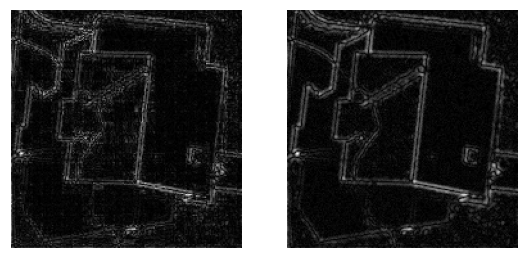

In [8]:
### BEGIN SOLUTION


### END SOLUTION



plt.figure(figsize=(6, 3), dpi=109)
plt.subplot(1,2,1)
plt.imshow(cv.convertScaleAbs(lap),cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv.convertScaleAbs(lap_binomial),cmap='gray')
plt.axis('off')
plt.show()

In [9]:

assert (laplacian_kernel_4[0] == [0,1,0]).all(), 'wrong laplacian_kernel_4'
assert lap[89,101] == 21.0, 'wrong laplacian results'
assert lap_binomial[89,101] == 20.0, 'wrong laplacian results'
